# imports

In [1]:
import pandas as pd
from scipy.stats import truncnorm
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.special import expit as activation_function

# reading for the data set

In [2]:
df = pd.read_csv("fashion-mnist_train.csv")
df2 = pd.read_csv("fashion-mnist_test.csv")

# manipulating the data to make it useable

In [3]:
data = np.array(df)
n_samples,n_features = data.shape

data_train = data[0:n_samples].T
Y_train = data_train[0]
X_train = data_train[1:n_features]/255
#data_train.shape



In [4]:
data_test = data[0:n_samples].T
Y_test = data_test[0]
X_test = data_test[1:n_features]/255
#data_test.shape

# making the neural network class

In [42]:
#all of these helper functions were taken from the labs 6 and 7

#relu function
@np.vectorize
def ReLU(x):
    return np.maximum(0,x)

#dderivative of Relu
@np.vectorize
def d_ReLU(x):
    return x > 0

#softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0)

#sigmoid function
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)

#derivative of sigmoid
@np.vectorize
def d_sigmoid(x):
    return x * (1.0 - x)

def one_hot_encode_Y(Y):
    newY = np.zeros ( (Y.size, Y.max() + 1))
    newY[np.arange(Y.size), Y] = 1
    newY = newY.T
    return newY

In [50]:
class neuralNetwork():
    
    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        self.w1 = np.random.rand(10, 784) - 0.5 
        self.b1 = np.random.rand(10, 1) - 0.5
        self.w2 = np.random.rand(10, 10) - 0.5 
        self.b2 = np.random.rand(10, 1) - 0.5
        return self.w1, self.b1, self.w2, self.b2
    
    def forward_pass(self):
        self.z1 = self.w1.dot(self.no_of_in_nodes) + self.b1
        self.a1 = ReLU(self.z1)
        self.z2 = self.w2.dot(self.a1) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2
    
    def backwards_pass(self):
        m = self.no_of_out_nodes.size
        newY = one_hot_encode_Y(self.no_of_out_nodes)
        self.dz2 = self.a2 - newY
        self.dw2 = 1/m * self.dz2.dot(self.a1.T)
        self.db2 = 1/m * np.sum(self.dz2)
        self.dz1 = self.w2.T.dot(self.dz2) * d_ReLU(self.z1)
        self.dw1 = 1/m * self.dz1.dot(self.no_of_in_nodes.T)
        self.db1 = 1/m * np.sum(self.dz1)
    
    def update_weights(self):
        self.w1 -= self.learning_rate * self.dw1
        self.b1 -= self.learning_rate * self.db1
        self.w2 -= self.learning_rate * self.dw2
        self.b2 -= self.learning_rate * self.db2
        
    def get_predictions(self):
        return np.argmax(self.a2, 0)

    def get_accuracy(self,predictions):
        return np.sum(predictions == self.no_of_out_nodes) / self.no_of_out_nodes.size
    
    
    def train(self, epochs):
        acc_list = []
        self.create_weight_matrices()
        for i in range(epochs):
            self.forward_pass()
            self.backwards_pass()
            self.update_weights()
            print(f'epoch: {i}') 
            print(f'Accuracy: {(self.get_accuracy(self.get_predictions ()))}% ')
            acc_list.append(self.get_accuracy(self.get_predictions ()))
        return acc_list
            
    

In [53]:
model = neuralNetwork(X_train,Y_train, 10 ,0.1)
accuracy = model.train(100)


epoch: 0
Accuracy: 0.0432% 
epoch: 1
Accuracy: 0.10955% 
epoch: 2
Accuracy: 0.11981666666666667% 
epoch: 3
Accuracy: 0.14148333333333332% 
epoch: 4
Accuracy: 0.16676666666666667% 
epoch: 5
Accuracy: 0.19418333333333335% 
epoch: 6
Accuracy: 0.21985% 
epoch: 7
Accuracy: 0.24328333333333332% 
epoch: 8
Accuracy: 0.263% 
epoch: 9
Accuracy: 0.2807% 
epoch: 10
Accuracy: 0.29635% 
epoch: 11
Accuracy: 0.3106333333333333% 
epoch: 12
Accuracy: 0.32543333333333335% 
epoch: 13
Accuracy: 0.33768333333333334% 
epoch: 14
Accuracy: 0.34955% 
epoch: 15
Accuracy: 0.36073333333333335% 
epoch: 16
Accuracy: 0.37196666666666667% 
epoch: 17
Accuracy: 0.38201666666666667% 
epoch: 18
Accuracy: 0.39248333333333335% 
epoch: 19
Accuracy: 0.4032833333333333% 
epoch: 20
Accuracy: 0.4137166666666667% 
epoch: 21
Accuracy: 0.4218166666666667% 
epoch: 22
Accuracy: 0.4318166666666667% 
epoch: 23
Accuracy: 0.4413% 
epoch: 24
Accuracy: 0.4518% 
epoch: 25
Accuracy: 0.46048333333333336% 
epoch: 26
Accuracy: 0.468483333333333

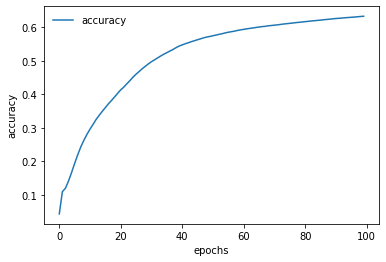

In [54]:
plt.plot(accuracy, label = 'accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(frameon = False)